# TC2- MACHINE LEARNING: CLASIFICACION DE LIRIOS
## Cuaderno 3: Implementación de la interfaz

#### Integrantes del Grupo Nº1
| NOMBRES Y APELLIDOS | CODIGO |ROL|
|:----------|----------|:----------|
| Ortiz Abanto Kevin Miguel| 20200230 | Integrante|
| Pachas Lopez Nabia Jazmin| 20200231 | Integrante| 
| Retuerto Santillan Mauro Alejandro| 20200202 | Coordinador|

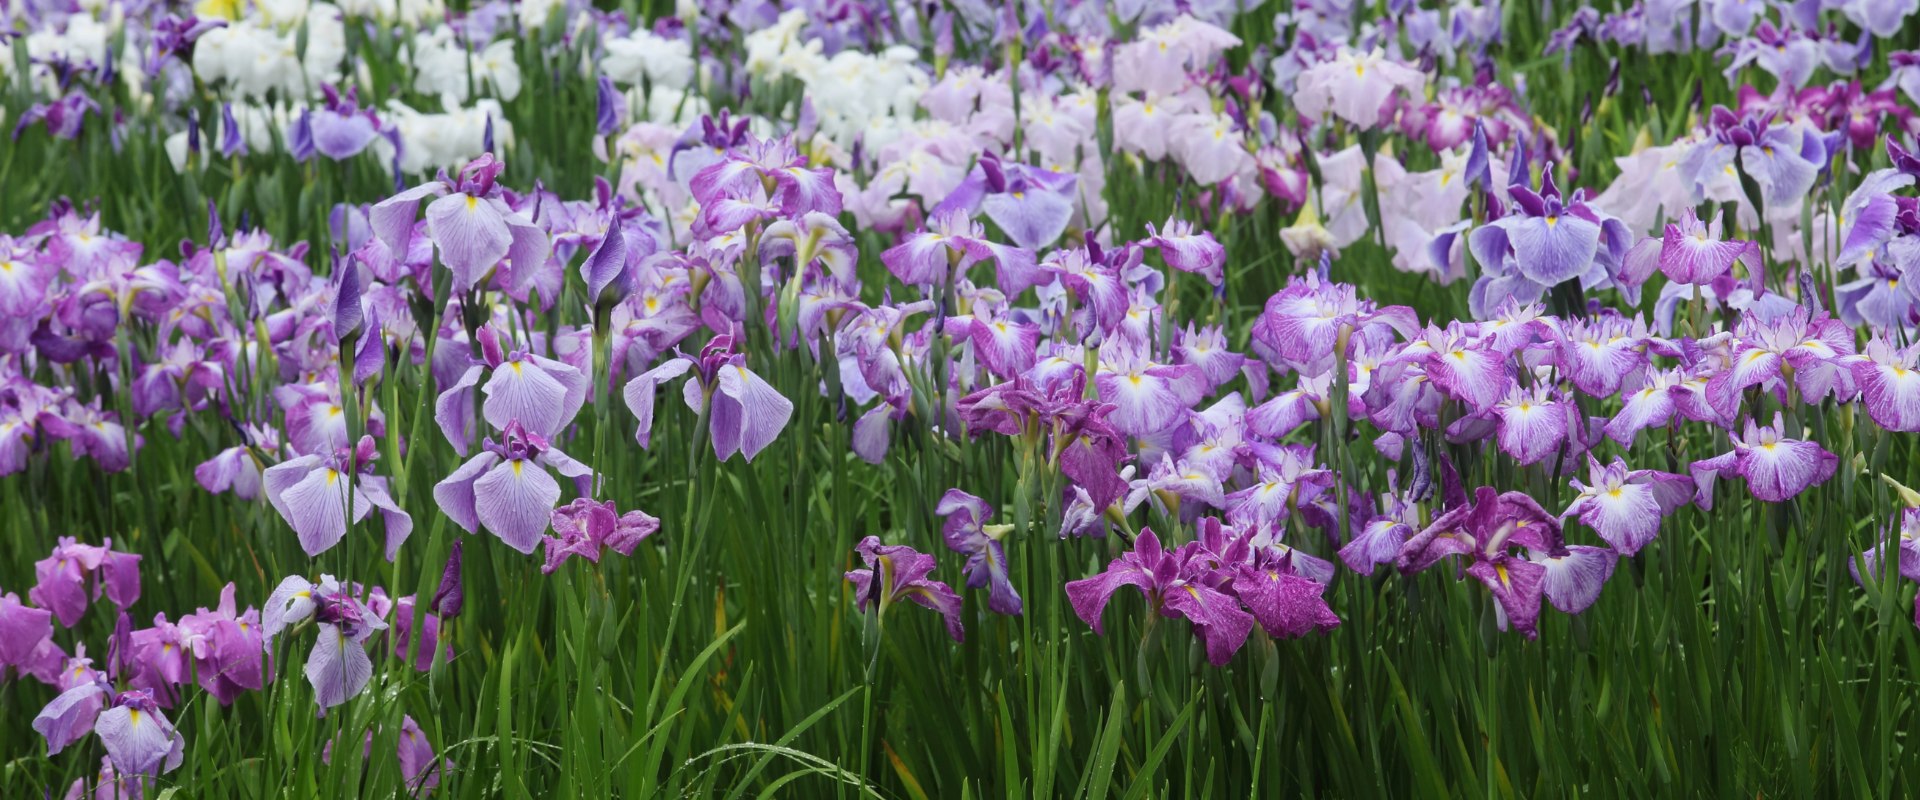

In [9]:
from IPython.display import Image
i = Image(filename='img_portadas\\iris_flores.png')
i

## 1.BIBLIOTECAS UTILIZADAS
Para la codificación de la interfaz se utilizaron 6 bibliotecas:
- **os:**  Permite realizar diversas tareas relacionadas con el sistema operativo, como la manipulación de archivos y directorios, la gestión de procesos, etc.
- **PyQt5:** Proporciona enlaces a la biblioteca Qt de C++. En el presente trabajo se utilizó Qt para la creación de las interfaces de usuario.
- **numpy:** Proporciona una estructura de datos eficiente y de alto rendimiento llamada "ndarray" (array multidimensional).
- **tensorflow:** Es una biblioteca de código abierto desarrollada por Google que se utiliza para realizar cálculos numéricos y construir modelos de aprendizaje automático.
- **NaiveBayes:**  Proporciona implementaciones de diferentes variantes de clasificadores de Bayes , como el clasificador de Bayes gaussiano (Gaussian Naive Bayes).
- **CV2:** Es una biblioteca de visión por computadora de código abierto que se utiliza para procesar y analizar imágenes y videos en Python.

In [1]:
import os
from PyQt5 import QtWidgets, uic, QtGui, QtCore
from PyQt5.QtWidgets import QFileDialog, QGraphicsScene
from PyQt5.QtCore import *
from PyQt5.QtGui import QPixmap,QImage
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from NaiveBayes import NaiveBayes
import cv2
import res

## 2.INTERFAZ INICIO

**Clase `inicio` :** Esta clase hereda de la clase QMainWindow perteneciente a la biblioteca QtWidgets en PyQt5. Representa la interfaz que se muestra a continuación.

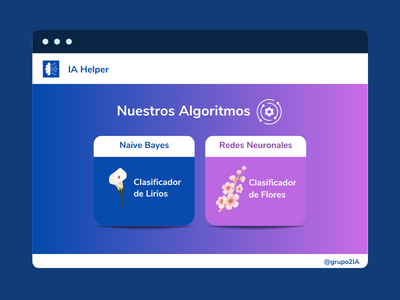

In [2]:
from IPython.display import Image
i = Image(filename='Interfaces\\1.png')
i

Dicha clase posee los siguientes métodos:
- `__init__` Es el constructor que se encarga de inicializar la ventana y los widgets.

- `direccionar_flores()` Metodo que muestra la interfaz `redes_neuronales` que contiene el clasificador de flores.

- `direccionar_lirios()` Metodo que muestra la interfaz `lirios_principal` que contiene el clasificador de lirios.

- `eventFilter()` Metodo que permite capturar y filtrar eventos generados por los objetos de la interfaz gráfica de usuario.

In [3]:
class inicio(QtWidgets.QMainWindow):

    def __init__(self):
        #Llama al constructor de la clase QMainWindow
        super(inicio, self).__init__()
        
        #Se carga el archivo de interfaz de usuario 'Prueba.ui' Este archivo contiene el diseño de la ventana
        uic.loadUi('Prueba.ui', self)
        
        #Devuelve un puntero al widget central actualmente configurado en la ventana principal
        central_widget = self.centralWidget()
        
        #Se utilizan los métodos findChild() para obtener referencias a los diferentes widgets
        self.frame_flores = central_widget.findChild(QtWidgets.QFrame, 'Flores') # Frame Clasificador de Flores
        self.frame_lirios = central_widget.findChild(QtWidgets.QFrame, 'Lirios') # Frame Clasificador de Lirios

        #Asigna el método direccionar_flores como el controlador de eventos para el evento mousePressEvent
        self.frame_flores.mousePressEvent = self.direccionar_flores
        self.frame_lirios.mousePressEvent = self.direccionar_lirios
        
        #Se instala un filtro de eventos en los botones
        self.frame_flores.installEventFilter(self)
        self.frame_lirios.installEventFilter(self)


    def direccionar_flores(self, event):
        #Se muestra la ventana redes_neuronales
        self.redes = redes_neuronales()
        self.redes.show()
        self.hide()


    def direccionar_lirios(self, event):
        #Se muestra la ventana lirios_principal
        self.lirios = lirios_principal()
        self.lirios.show()
        self.hide()
        

    def eventFilter(self, obj, event):
        #Se verifica si el cursor del mouse ha ingresado al objeto al que se le ha aplicado el filtro
        if event.type() == QtCore.QEvent.Enter:
            #Se establece el cursor del mouse como PointingHandCursor (cursor de mano señalando)
            self.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
            
        #Se verifica si el cursor del mouse ha salido del objeto
        elif event.type() == QtCore.QEvent.Leave:
            #Se restablece el cursor del mouse al cursor predeterminado
            self.setCursor(QtGui.QCursor(QtCore.Qt.ArrowCursor))

        return super().eventFilter(obj, event)

## 2.INTERFAZ REDES NEURONALES: Clasificación de Flores

**Clase `redes_neuronales` :** Esta clase hereda de la clase QMainWindow perteneciente a la biblioteca QtWidgets en PyQt5. Representa la interfaz que se muestra a continuación.

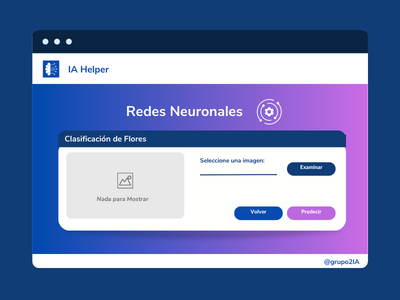

In [4]:
from IPython.display import Image
i = Image(filename='Interfaces\\4.png')
i

Dicha clase posee los siguientes métodos:
- `__init__` Es el constructor que se encarga de inicializar la ventana y los widgets.

- `eventFilter()` Metodo que permite capturar y filtrar eventos generados por los objetos de la interfaz gráfica de usuario.

- `clickboton_volver()` Metodo que retorna al usuario a la interfaz inicial.

- `clickboton_predecir()` Metodo que contiene el fragmento de codigo a ejecutar cuando se presiona el boton Predecir.

- `segundo_estado()` Metodo que establece si los componentes serán visibles a partir del valor de flag

- `clickboton_cargar()` Metodo que contiene el fragmento de codigo a ejecutar cuando se presiona el boton Cargar.

- `setPhoto()` Metodo que muestra la imagen que fue subida desde el explorador de archivos.

- `comprobar_datos()` Metodo que comprueba que los datos ingresados sean del tipo **float**.



In [5]:
class redes_neuronales(QtWidgets.QMainWindow):

    def __init__(self):
        #Llama al constructor de la clase QMainWindow
        super(redes_neuronales, self).__init__()
        
        # Se inicializa el flag en falso
        self.flag=False
        
        #Se carga el archivo de interfaz de usuario 'FinalPrueba1.ui' Este archivo contiene el diseño de la ventana
        uic.loadUi('FinalPrueba1.ui', self)

        #Se establece una escena vacía en el objeto QGraphicsView
        self.Vista.setScene(QGraphicsScene())
        
        #Devuelve un puntero al widget central actualmente configurado en la ventana principal
        central_widget = self.centralWidget()

        #Se utilizan los métodos findChild() para obtener referencias a los diferentes widgets
        self.volver = self.findChild(QtWidgets.QPushButton, 'Volver')  # Boton Volver
        self.examinar = self.findChild(QtWidgets.QPushButton, 'Examinar') #Boton Examinar
        self.predecir = self.findChild(QtWidgets.QPushButton, 'Predecir') # Boton Predicir

        self.punto1 = central_widget.findChild(QtWidgets.QFrame, 'frame_12') # Frame 12
        self.punto2 = central_widget.findChild(QtWidgets.QFrame, 'frame_13') # Frame 13

        #Se indica que el segundo estado de la ventana aun no se activará
        self.segundo_estado(False)

        #Se instala un filtro de eventos en los botones
        self.volver.installEventFilter(self)
        self.examinar.installEventFilter(self)
        self.predecir.installEventFilter(self)
        
        #Se conectan las señales de los botones ("clicked") a los correspondientes métodos de la clase
        self.volver.clicked.connect(self.clickboton_volver)
        self.examinar.clicked.connect(self.clickboton_cargar)
        self.predecir.clicked.connect(self.clickboton_predecir)
        

        
    def eventFilter(self, obj, event):
        if event.type() == QtCore.QEvent.Enter:
            self.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))

        elif event.type() == QtCore.QEvent.Leave:
            self.setCursor(QtGui.QCursor(QtCore.Qt.ArrowCursor))

        return super().eventFilter(obj, event)
    

    def clickboton_volver(self):
        #Muestra la interfaz inicio
        self.inicio = inicio()
        self.inicio.show()
        self.hide()

    def clickboton_predecir(self):
        
        #Se obtiene el texto actual del Boton Precir y se almacena
        estado_predecir = self.predecir.text()
        
        if(self.flag):
            # Apartir del texto del boton se aun no se ha realizado la prediccion
            if(estado_predecir == "Predecir"):
                
                self.segundo_estado(True)
                
                #Se define una tupla target_size que representa el tamaño objetivo de la imagen 
                target_size = (256, 256)  

                # Se carga la imagen y realiza el preprocesamiento necesario
                im = image.load_img(self.img, target_size=target_size)
                image_array = image.img_to_array(im)
                
                #Se agrega una dimensión adicional al array de la imagen. 
                #para que coincida con la forma esperada por el modelo de clasificación.
                image_array = np.expand_dims(image_array, axis=0)
                
                #La escala de los valores de píxel se normaliza
                image_array /= 255.0 

                # Se carga el modelo entrenado
                modelo = load_model('ResNet50V2.h5')  
                
                #Se realiza la prediccion
                prediccion = modelo.predict(image_array)
                class_names = ['Girasoles', 'Lavandas', 'Lirios', 'Margaritas', 'Rosas'] 
                
                #Se encuentra el índice del valor de predicción más alto en el array prediccion
                pred_index = np.argmax(prediccion)
                
                #Se obtiene el nombre de la clase correspondiente
                pred = class_names[pred_index]

                self.label_13.setText(pred)
                self.label_14.setText("92.44%")

                #Se establece el texto del boton como "Predecir otro"
                self.predecir.setText("Predecir Otro")

            else:
                # Si ya se realizar la prediccion y el usuario da clic en "Predecir otro", se resetean los componentes
                self.segundo_estado(False)
                self.label_10.setVisible(True)
                self.label_9.setVisible(True)
                self.label_8.setText("")
                self.flag=False
                self.Vista.scene().clear()
                self.predecir.setText("Predecir")
        

    def segundo_estado(self,flag):
        #Establece si los componentes serán visibles a partir del valor de flag
        self.label_11.setVisible(flag)
        self.label_12.setVisible(flag)
        self.label_13.setVisible(flag)
        self.label_14.setVisible(flag)

        self.punto1.setVisible(flag)
        self.punto2.setVisible(flag)

    def clickboton_cargar(self):
        
        #Se abre un cuadro de diálogo para seleccionar un archivo de imagen
        filename = QFileDialog.getOpenFileName(filter="Image (*.*)")[0]
        
        #Se verifica si el archivo seleccionado es una imagen
        if self.is_image(filename):
            imagen = cv2.imread(filename)
            #Se muestra la foto
            self.setPhoto(imagen)
            
            #La ruta del archivo de imagen seleccionado se almacena
            self.img=filename
            # Se ocultan los labels 9 y 10
            self.label_10.setVisible(False)
            self.label_9.setVisible(False)
            
            nombre_archivo = os.path.basename(filename)
            #Se muestra el nombre del archivo seleccionado
            self.label_8.setText(nombre_archivo)
            self.flag=True
            
        else:
            self.flag=False
            print("errorjsjjssj")


    def setPhoto(self,imagen):
        #Se obtienen las dimensiones de la imagen 
        height, width, channel = imagen.shape
        #Se calcula el número de bytes por línea de la imagen multiplicando el número de canales
        bytes_per_line = channel * width
        
        #Se crea una instancia de QImage
        q_img = QPixmap.fromImage(QImage(imagen.data, width, height, bytes_per_line, QImage.Format_BGR888))
        
        # Se borra la escena asociada al objeto self.Vista para eliminar cualquier contenido previo.
        self.Vista.scene().clear()
        # Se agrega el objeto q_img a la escena 
        self.Vista.scene().addPixmap(q_img)
        #Ajusta la vista del objeto self.Vista para que la imagen se ajuste en la ventana de visualización
        self.Vista.fitInView(self.Vista.scene().sceneRect(), Qt.AspectRatioMode.KeepAspectRatio)


    def is_image(self, filename):
        #Se verifica la extension del archivo
        valid_extensions = [".png", ".jpg", ".jpeg", ".bmp"]
        file_extension = os.path.splitext(filename)[1].lower()
        return file_extension in valid_extensions



## 2.INTERFAZ NAIVE BAYES 1 : Clasificación de Lirios

**Clase `lirios_principal` :** Esta clase hereda de la clase QMainWindow perteneciente a la biblioteca QtWidgets en PyQt5. Representa la interfaz que se muestra a continuación.

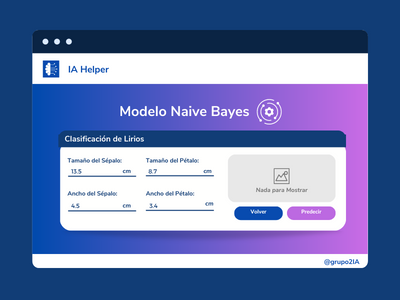

In [6]:
from IPython.display import Image
i = Image(filename='Interfaces\\2.png')
i

Dicha clase posee los siguientes métodos:
- `__init__` Es el constructor que se encarga de inicializar la ventana y los widgets.

- `clickboton_predecir()` Metodo que contiene el fragmento de codigo a ejecutar cuando se presiona el boton Predecir.

- `leer_datos()` Metodo que lee los datos a partir de los 4 campos de entrada mostrados por la interfaz.

- `comprobar_datos()` Metodo que comprueba que los datos ingresados sean del tipo **float**.

- `clickboton_volver()` Metodo que retorna al usuario a la interfaz inicial.

- `eventFilter()` Metodo que permite capturar y filtrar eventos generados por los objetos de la interfaz gráfica de usuario.

In [7]:
class lirios_principal(QtWidgets.QMainWindow):

    def __init__(self):
        #Llama al constructor de la clase QMainWindow
        super(lirios_principal, self).__init__()
        
        #Se carga el archivo de interfaz de usuario 'Lirios.ui' Este archivo contiene el diseño de la ventana
        uic.loadUi('Lirios.ui', self)

        #Se utilizan los métodos findChild() para obtener referencias a los diferentes widgets
        self.volver = self.findChild(QtWidgets.QPushButton, 'Volver') #Boton Volver
        self.predecir = self.findChild(QtWidgets.QPushButton, 'Predecir') #Boton Predecir

        self.input_sep_l = self.findChild(QtWidgets.QLineEdit, 'input_sep_l') #Campo de entrada --> Longitud del sepalo
        self.input_sep_w = self.findChild(QtWidgets.QLineEdit, 'input_sep_w') #Campo de entrada --> Ancho del sepalo
        self.input_pet_l = self.findChild(QtWidgets.QLineEdit, 'input_pet_l') #Campo de entrada --> Longitud del petalo
        self.input_pet_w = self.findChild(QtWidgets.QLineEdit, 'input_pet_w') #Campo de entrada --> Ancho del petalo
        
        #Se instala un filtro de eventos en los botones "Volver" y "Predecir" 
        self.volver.installEventFilter(self)
        self.predecir.installEventFilter(self)

        #Se conectan las señales de los botones ("clicked") a los correspondientes métodos de la clase
        self.volver.clicked.connect(self.clickboton_volver)
        self.predecir.clicked.connect(self.clickboton_predecir)

    def clickboton_predecir(self):
        #Inicializacion
        self.sample = None
        self.prediccion = ''
        
        #Se llama al método leer datos
        self.leer_datos()
        
        #Se carga el modelo Naive Bayes previamente entrenado 
        modelo_nb = NaiveBayes()
        modelo_nb.load_model('model_nb.h5')
        
        #Se realiza la predicción
        predict = modelo_nb.predict(self.sample)

        #Se crea una instancia de la ventana lirios_prediccion y se muestra
        self.lirios_predecir = lirios_prediccion(self.sample, predict)
        self.lirios_predecir.show()
        self.hide()

    def leer_datos(self):
        #Se leen los datos de los campos de entrada
        sep_l = self.input_sep_l.text()
        sep_w = self.input_sep_w.text()
        pet_l = self.input_pet_l.text()
        pet_w = self.input_pet_w.text()

        datos = [sep_l, sep_w, pet_l, pet_w]
        
        #Se comprueba que sean correctos
        if self.comprobar_datos(datos):
            #En caso de que si, se asigna al atributo 'sample'
            self.sample = np.array([datos], dtype=float)

    def comprobar_datos(self, datos):
        #Se recorre todos los datos y se comprueba que sean float
        for i in range(len(datos)):
            try:
                float(datos[i])
            except ValueError as e:
                print(e)
                return False

        return True

    def clickboton_volver(self):
        #Muestra la ventana inicio
        self.inicio = inicio()
        self.inicio.show()
        #Oculta la ventana actual
        self.hide()

    def eventFilter(self, obj, event):
        #Se verifica si el cursor del mouse ha ingresado al objeto al que se le ha aplicado el filtro
        if event.type() == QtCore.QEvent.Enter:
            
            #Se establece el cursor del mouse como PointingHandCursor (cursor de mano señalando)
            self.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))
            
        #Se verifica si el cursor del mouse ha salido del objeto
        elif event.type() == QtCore.QEvent.Leave:
            
            #Se restablece el cursor del mouse al cursor predeterminado
            self.setCursor(QtGui.QCursor(QtCore.Qt.ArrowCursor))

        return super().eventFilter(obj, event)
    

## 2.INTERFAZ NAIVE BAYES 2 : Clasificación de Lirios

**Clase `lirios_prediccion` :** Esta clase hereda de la clase QMainWindow perteneciente a la biblioteca QtWidgets en PyQt5. Representa la interfaz que se muestra a continuación.

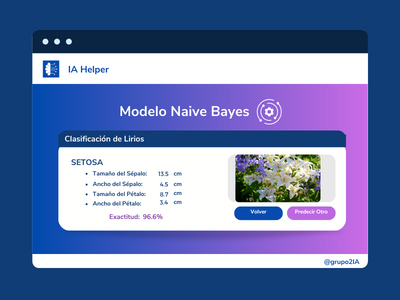

In [8]:
from IPython.display import Image
i = Image(filename='Interfaces\\3.png')
i

Dicha clase posee los siguientes métodos:
- `__init__` Es el constructor que se encarga de inicializar la ventana y los widgets.

- `clickboton_volver()` Metodo que retorna al usuario a la interfaz inicial.

- `clickboton_predecir_otro()` Metodo que retorna al usuario a la interfaz `lirios_principal`.

- `eventFilter()` Metodo que permite capturar y filtrar eventos generados por los objetos de la interfaz gráfica de usuario.

In [10]:
class lirios_prediccion(QtWidgets.QMainWindow):

    def __init__(self, datos, predicts):
        # Llama al constructor de la superclase 
        super(lirios_prediccion, self).__init__()
        
        #Se carga el archivo de interfaz de usuario 'Predict_Lirios.ui' Este archivo contiene el diseño de la ventana
        uic.loadUi('Predict_Lirios.ui', self)
        
        #Se utilizan las funciones self.findChild() para buscar y obtener las referencias a varios elementos de la interfaz
        self.volver = self.findChild(QtWidgets.QPushButton, 'Volver') #Boton Volver 
        self.predecir_otro = self.findChild(QtWidgets.QPushButton, 'Predecir') # Boton Predecir
        self.output_sep_l = self.findChild(QtWidgets.QLabel, 'output_sep_l') # Etiqueta de texto Longitud del Sepalo
        self.output_sep_w = self.findChild(QtWidgets.QLabel, 'output_sep_w') # Etiqueta de texto Ancho del Sepalo
        self.output_pet_l = self.findChild(QtWidgets.QLabel, 'output_pet_l') # Etiqueta de texto Longitud del Petalo
        self.output_pet_w = self.findChild(QtWidgets.QLabel, 'output_pet_w') # Etiqueta de texto Ancho del Petalo
        self.output_predict = self.findChild(QtWidgets.QLabel, 'output_predict')  # Etiqueta con la Prediccion realizada
        self.output_exactitud = self.findChild(QtWidgets.QLabel, 'output_exactitud') #Etiqueta con la exactitud del modelo
        self.img_resultado = self.findChild(QtWidgets.QLabel, 'img_resultado') #Imagen del resultado
        
        # Establece el texto de las etiquetas 
        self.output_sep_l.setText(f"{datos[0][0]} cm")
        self.output_sep_w.setText(f"{datos[0][1]} cm")
        self.output_pet_l.setText(f"{datos[0][2]} cm")
        self.output_pet_w.setText(f"{datos[0][3]} cm")

        #Se define un diccionarioque asigna un nro de predicción a un nombre de clase y una imagen correspondiente.
        resultado = {
            0: {"nombre": "Setosa", "imagen": "img/setosa.jpg"},
            1: {"nombre": "Versicolor", "imagen": "img/versicolor.jpg"},
            2: {"nombre": "Virginica", "imagen": "img/virginica.jpg"}
        }
        #Asigna la predicción obtenida del modelo (predicts[0]) al atributo prediccion
        self.prediccion = resultado[predicts[0]]

        #Establece el texto de la etiqueta output_predict con el nombre de la clase predicha
        self.output_predict.setText(self.prediccion["nombre"])
                                                    
        # Se muestra la imagen y la exactitud
        self.img_resultado.setPixmap(QtGui.QPixmap(self.prediccion["imagen"]))
        self.output_exactitud.setText("100.0%")
         #Se instala un filtro de eventos en los botones
        self.volver.installEventFilter(self)
        self.predecir_otro.installEventFilter(self)
        
        #Se conectan las señales de los botones ("clicked") a los correspondientes métodos de la clase
        self.volver.clicked.connect(self.clickboton_volver)
        self.predecir_otro.clicked.connect(self.clickboton_predecir_otro)
        

    def clickboton_volver(self):
        #Muestra la ventana inicio                                            
        self.inicio = inicio()
        self.inicio.show()
                                                    
        #Oculta la ventana actual
        self.hide()

    def clickboton_predecir_otro(self):
        #Crea una ventana lirios_principal y la muestra
        self.lirios_principal = lirios_principal()
        self.lirios_principal.show()
        self.hide()
    
    
    def eventFilter(self, obj, event):
        if event.type() == QtCore.QEvent.Enter:
            self.setCursor(QtGui.QCursor(QtCore.Qt.PointingHandCursor))

        elif event.type() == QtCore.QEvent.Leave:
            self.setCursor(QtGui.QCursor(QtCore.Qt.ArrowCursor))

        return super().eventFilter(obj, event)


## EJECUCION
Ejecutamos la aplicación implementada.

In [11]:
if __name__ == "__main__":
    app = QtWidgets.QApplication([])
    ventana = inicio()
    ventana.show()
    app.exec()

1/1 [==============================] - 3s 3s/step
